<a id = "top"></a>
# Predictions Demonstration

---

Welcome to the demonstrations notebook! If you find yourself here, first click "Cell" then "Run All". Then click <a href = "#pred">HERE</a> and feel free to start making predictions of your own!

#### Other Notebooks
- [Cleaning and EDA](cleaning_and_EDA.ipynb)
- [Modeling](modeling.ipynb)
- [Additional Modeling](adtl_modeling.ipynb)
- [Presentation Prep](presentation_prep.ipynb)

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [173]:
ames = pd.read_csv("../datasets/ames_plus.csv")

In [174]:
features = ["total_sq_ft", "age", "kitchen_qual", "bsmt_qual", "garage_cars"]

In [175]:
X = ames[features]
y = ames["saleprice"]

mlr_model = LinearRegression()
mlr_model = mlr_model.fit(X, y)

intercept = mlr_model.intercept_

mlr_model.score(X, y)

0.8106088549905086

In [176]:
cross_val_score(mlr_model, X, y, cv = 5).mean()

0.8095004582225671

In [177]:
coefs = pd.DataFrame()
coefs["feature"] = features
coefs["mlr_coefs"] = mlr_model.coef_
coefs

,feature,mlr_coefs
0,total_sq_ft,56.675486
1,age,-282.355827
2,kitchen_qual,30395.625164
3,bsmt_qual,4995.360010
4,garage_cars,13276.081937


In [178]:
def make_prediction(sq_ft, age, kit, bsmt, cars):
    df = pd.DataFrame({
        "total_sq_ft": [sq_ft],
        "age": [age],
        "kitchen_qual": [kit],
        "bsmt_qual": [bsmt],
        "garage_cars": [cars]
    })
    
#     print(f"With {sq_ft} square feet...")
#     print(f"{age} years old...")
#     print(f"A kitchen quality of {kit}...")
#     print(f"A basement quality of {bsmt}...")      
#     print(f"And {cars} cars in the garage...")
#     print("Your dream home will cost only", int(mlr_model.predict(df)), "dollars!")
    return int(mlr_model.predict(df))

In [179]:
# Finding the price of Jimmy's house!

make_prediction(2000, 5, 3, 3, 2)

144943

In [180]:
# Calculating the age of Jimathy's house using his budget of 144,943 dollars!

ph = ((56.67548555 * 5000) + (30395.62516387 * 5) + (4995.36001 * 5) + (13276.08193661 * 5) + intercept - 144943)
ph / 282.35582703

998.9134230758852

<a id = "pred"></a>

### Choose your own features here!

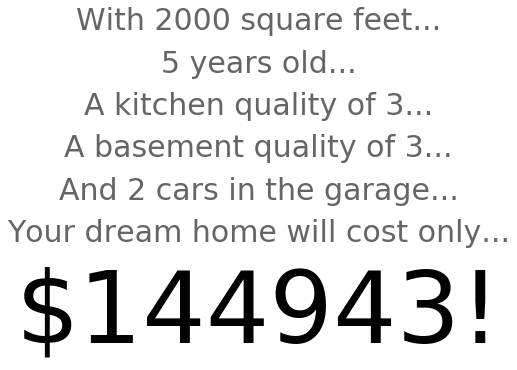

In [185]:
# Change these values to your liking, then press Shift and Enter to run!

dream_home = {
    
    "SquareFootage": 2000,
    
    "Age": 5,
    
    "KitchenQuality": 3, 
    
    "BasementQuality": 3,
    
    "GarageCars": 2
    
    }

pred = make_prediction(dream_home["SquareFootage"], 
                       dream_home["Age"], 
                       dream_home["KitchenQuality"], 
                       dream_home["BasementQuality"], 
                       dream_home["GarageCars"])

# Code adapted from data viz lecture
plt.figure(figsize=(8, 6))

plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.99,                              # at vertical = 0.9
         s = f"With {dream_home['SquareFootage']} square feet...",
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 30,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear

plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.86,                              # at vertical = 0.9
         s = f"{dream_home['Age']} years old...",
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 30,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear

plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.73,                              # at vertical = 0.9
         s = f"A kitchen quality of {dream_home['KitchenQuality']}...",
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 30,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear

plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.60,                              # at vertical = 0.9
         s = f"A basement quality of {dream_home['BasementQuality']}...",
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 30,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear

plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.47,                              # at vertical = 0.9
         s = f"And {dream_home['GarageCars']} cars in the garage...",
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 30,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear

plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.34,                              # at vertical = 0.9
         s = "Your dream home will cost only...",
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 30,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear

plt.text(x = 0.5,
         y = 0.09,
         s = "$" + str(pred) + "!",
         ha = 'center',
         va = 'center',
         size = 100,
         alpha = 1)

plt.axis('off');

---
- [Back to top](#top)